In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Задание 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):<br> zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]<br> ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].<br> Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [13]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

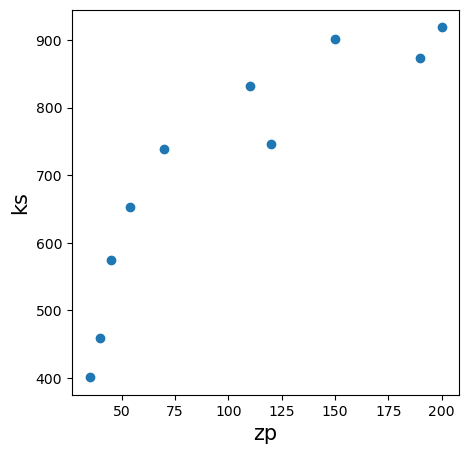

In [15]:
plt.figure(figsize=(5, 5)) # графическая зависимость между массивами
plt.scatter(zp, ks)
plt.xlabel('zp', fontsize=15)
plt.ylabel('ks', fontsize=15)
plt.show()

Вероятно наличе линейной зависимости

In [18]:
b = ((zp * ks).mean() - zp.mean() * ks.mean()) / ((zp ** 2).mean() - zp.mean() ** 2)
b

2.620538882402765

In [20]:
a = ks.mean() - b * zp.mean()
a

444.1773573243596

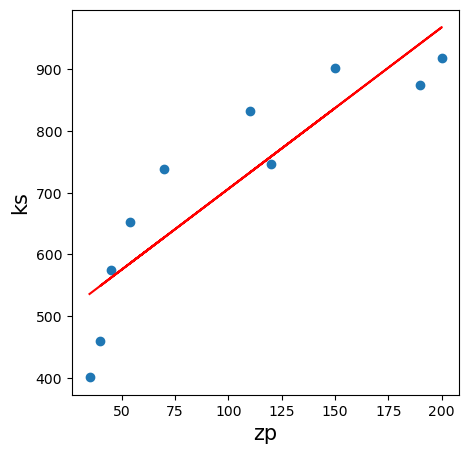

In [24]:
plt.figure(figsize=(5, 5)) 
plt.scatter(zp, ks)
plt.plot(zp, a + b * zp, color = 'r')
plt.xlabel('zp', fontsize=15)
plt.ylabel('ks', fontsize=15)
plt.show()

Линейная зависимость присутствует

#### Задание 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [36]:
def mse(b, x, y): # Функция потерь
    return np.sum((b * x - y) ** 2) / len(x)

In [26]:
mse(b, zp, ks)

203763.93896082853

In [41]:
def los(b, x, y): # Производная функции потерь
    return (2 / len(x)) * np.sum((b * x - y) * x)

In [42]:
alpha = 1e-6
b = 0.1
mse_min = mse(b, zp, ks)
i_min = 1
b_min = b
for i in range(10000):
    b -= alpha * los(b, zp, ks)
    if i % 100 == 0:
        print(f'Iteration #{i}, b={b}, mse={mse(b, zp, ks)}')
    if mse(b, zp, ks) > mse_min:
        print(f'Iteration #{i_min}, b={b_min}, mse={mse_min},\n'
              f'Minimum \n'
              f' {b_min} ')
        break
    else:
        mse_min = mse(b,zp,ks)
        i_min = i
        b_min = b

Iteration #0, b=0.25952808000000005, mse=493237.7212546963
Iteration #100, b=5.54537842245223, mse=58151.31823171113
Iteration #200, b=5.868748638669329, mse=56522.97550129376
Iteration #300, b=5.888531320728348, mse=56516.88130936019
Iteration #400, b=5.8897415574471985, mse=56516.85850140053
Iteration #500, b=5.889815595583751, mse=56516.858416040064
Iteration #600, b=5.889820124983314, mse=56516.85841572062
Iteration #628, b=5.889820285147628, mse=56516.85841571966,
Minimum 
 5.889820285147628 


#### Задани 3
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [44]:
def mse_ab(a,b, x, y):
    return np.sum(((a + b * x)-y) ** 2) / len(x)

In [39]:
def losa(a, b, x, y): # Производная функции потерь a
    return 2 * np.sum((a + b * x) - y) / len(x)

In [46]:
def losb(a, b, x, y): # Производная функции потерь b
    return 2 * np.sum(((a + b * x) - y) * x) / len(x)

In [47]:
alpha = 3e-5
b = 0.1
a = 0.1
mseab_min = mse_ab(a, b, zp, ks)
i_min = 1
b_min = b
a_min = a  
for i in range(1000000):
    a -= alpha * losa(a, b, zp, ks)
    b -= alpha * losb(a, b, zp, ks)
    if i % 50000 == 0:
        print(f'Iteration #{i}, a={a}, b={b}, mse={mse_ab(a, b, zp, ks)}')
    if mse_ab(a, b, zp, ks) > mseab_min:
        print(f'Iteration #{i_min}, a={a_min}, b={b_min}, mse={mseab_min},\n'
              f'Minimum')
        break
    else:
        mseab_min = mse_ab(a, b, zp, ks)
        i_min = i
        b_min = b
        a_min = a
print(f'a = {a_min}\n'
      f'b = {b_min}')

Iteration #0, a=0.14197959999999998, b=4.884978596113599, mse=70366.2821016992
Iteration #50000, a=236.72655235964433, b=4.147445287981601, mse=17387.09579189967
Iteration #100000, a=347.2559075176058, b=3.3339127474648516, mse=8853.283372220058
Iteration #150000, a=398.89545333636954, b=2.953828643644366, mse=6990.541626266601
Iteration #200000, a=423.0215571081485, b=2.7762525556795365, mse=6583.946467915477
Iteration #250000, a=434.29332323191153, b=2.69328863611563, mse=6495.195773862671
Iteration #300000, a=439.5595159313502, b=2.6545277194387675, mse=6475.823468184463
Iteration #350000, a=442.0198921708081, b=2.6364185381280407, mse=6471.594924044105
Iteration #400000, a=443.16938509390076, b=2.6279578907579992, mse=6470.671926759022
Iteration #450000, a=443.70643059087314, b=2.624005058617609, mse=6470.470456948132
Iteration #500000, a=443.95733936988626, b=2.622158287177236, mse=6470.426480562332
Iteration #550000, a=444.07456447602823, b=2.6212954716991606, mse=6470.4168814938